In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.linalg import solve

# Trabajo Práctico 1 - Matrices de Insumo Producto

### Consigna 1

Tenemos que:

$$
\begin{aligned}
& p = Ap + d \\
& p - Ap = d \\
& (I-A)p = d \\
& p = (I-A)^{-1}d
\end{aligned}
$$

De esta manera:

- **a. Si $(I-A)$ es inversible:**

$$
p = (I-A)^{-1}d
$$

Nos encontramos con un sistema de ecuaciones lineales de unica solucion, de manera que podriamos obtener los valores de salida (output) totales, dado el vector de demanda externa.

- **b. Si $(I-A)$ es inversible y $d=\vec{0}$:**

$$
p = \vec{0}
$$

Lo cual nos dice que la produccion total necesaria para cubrir la demanda externa es 0.

- **c. Cuando $(I-A)$ no es inversible:**

Esto implica que la matriz tiene filas o columnas linealmente dependientes, lo que significa que el sistema puede ser compatible indeterminado (infinitas soluciones) o incompatible (sin solución). Es mas, existe un vector no nulo $v$ tal que $(I-A)v = 0$

En este caso, pueden ocurrir dos situaciones:
   
   - a) El sistema puede ser **compatible indeterminado**:

      - **Condición para que exista solución:** El sistema tendrá solución si y solo si $d$ puede ser expresado como una combinación lineal de las columnas de $(I-A)$
      - Si encontramos una solución particular $p_0$, todas las soluciones serán de la forma $p = p_0 + v$, donde $v$ es cualquier vector que cumpla $(I-A)v = 0$ (Esto es valido pues las matrices son distributivas respecto a la suma)
   
   - b) El sistema puede ser **incompatible**:

      - Esto ocurre cuando $d$ no puede ser expresado como combinación lineal de las columnas de $(I-A)$
      - En términos económicos, no existiría ningún plan de producción que satisfaga la demanda externa $d$

En el contexto del problema, esto significa que cuando $(I-A)$ no es inversible, debemos analizar cuidadosamente el vector de demanda externa $d$. Si bien no podemos usar el método de la matriz inversa, el sistema aún podría tener solución (posiblemente infinitas soluciones).

- **d. $(I-A)$ no es inversible y $d=\vec{0}$:**

Cuando $(\mathbf{I} - \mathbf{A})$ no es inversible, esto implica que la matriz tiene filas o columnas linealmente dependientes, lo que significa que el sistema puede ser compatible indeterminado (infinitas soluciones) o incompatible (sin solución)

Sin embargo, al tener $\mathbf{d} = \vec{0}$, estamos tratando con un sistema homogéneo:

$(\mathbf{I} - \mathbf{A})\mathbf{p} = \vec{0}.$

En este caso, la solución trivial $\mathbf{p} = \vec{0}$ siempre existe, pero debido a la no invertibilidad de $(\mathbf{I} - \mathbf{A})$ es posible que existan otras soluciones no triviales (infinitas soluciones) si el sistema es compatible indeterminado. Esto se debe a la dependencia lineal en $(\mathbf{I} - \mathbf{A})$ (es decir, su determinante es 0), lo que permite la existencia de múltiples planes de producción posibles incluso cuando no hay demanda externa.

En resumen, la producción total necesaria para satisfacer la demanda externa puede ser $\mathbf{p} = \vec{0}$, pero también puede haber infinitos planes de producción debido a la singularidad de $(\mathbf{I} - \mathbf{A})$


---

### Consigna 2

Las funciones estan en el archivo `funciones.py`. Ejecutamos el siguiente codigo para importar las funciones que usaremos en el ejercicio 3

In [2]:
from funciones import calcularLU, inversaLU

### Consigna 3 -  

Tenemos que resolver el siguiente sistema usando lo que hicimos en la consigna 2.

$\mathbf{A} = 
\begin{pmatrix}
0.3 & 0.0 & 0.1 \\
0.05 & 1.0 & 0.2 \\
0.1 & 0.15 & 0.1
\end{pmatrix}, \quad
\mathbf{d} = 
\begin{pmatrix}
100 \\
100 \\
300
\end{pmatrix}$

respondiendo lo siguiente:

-  ¿Hay una justificación económica de los valores encontrados para $\mathbf{p}$?
- ¿Cuál es la característica de la matriz que lleva a esta solución?



In [3]:
A = np.array([[0.3, 0.0, 0.1],
             [0.05, 1.0, 0.2],
             [0.1, 0.15, 0.1]])

d = np.array([100,100,300])
I = np.eye(3)
P,L,U = calcularLU(I-A)
Lontief = inversaLU(L,U,P)
print("La matriz de Leontief queda:\n",Lontief)

print("\nInversa con numpy:\n",np.linalg.inv(I-A))

La matriz de Leontief queda:
 [[  1.37931034  -0.68965517   0.        ]
 [ -2.98850575 -28.50574713  -6.66666667]
 [ -0.34482759  -4.82758621   0.        ]]

Inversa con numpy:
 [[  1.37931034  -0.68965517   0.        ]
 [ -2.98850575 -28.50574713  -6.66666667]
 [ -0.34482759  -4.82758621  -0.        ]]


In [4]:
# Calculamos el vector producto, multiplicacndo la matriz de Leontief por el vector d
Lontief@d

array([   68.96551724, -5149.42528736,  -517.24137931])

1. **Incoherencia de los Valores Negativos en el Vector  $p$:**
   - El vector de producción $p$ obtenido al resolver el sistema $ p = (I - A)^{-1} \cdot d $ contiene valores negativos, lo cual no tiene sentido económico. En un modelo de producción, los valores negativos indican que un sector debería reducir su producción para satisfacer la demanda, lo cual es imposible y sugiere una inestabilidad en el sistema económico modelado.

2. **Error en la Estructura de la Matriz $A$:**
   - Analizando la matriz $\mathbf{A}$, observamos que el coeficiente de producción para el segundo sector es ($a_{22} = 1.0$), Esto significa que, para producir una unidad de output del sector 2, se requiere exactamente una unidad de insumo del propio sector 2. Adicionalmente, se necesitan $ a_{12} = 0.0 $ unidades del sector 1 y $a_{32} = 0.15$ unidades del sector 3. Esto implica que el sector 2 consume toda su producción y más, sin generar un output neto para satisfacer la demanda final o para ser utilizado por otros sectores, lo cual es insostenible desde el punto de vista económico.

3. **Dependencia Interna Intensa:**
   - La matriz $A$ muestra una alta interdependencia entre los sectores económicos, especialmente en el segundo sector, que depende completamente de su propia producción para operar. Esto genera una retroalimentación negativa exagerada y amplifica las demandas internas, causando inestabilidad y sensibilidad extrema en la producción. Esta dependencia intensa es una de las razones clave por las cuales el modelo arroja resultados no realistas y no interpretables económicamente.

En conclusión, la estructura interna de la matriz $A$ lleva a un modelo matemáticamente inestable y conduce a un modelo económicamente inviable (especificamente el coeficiente $a_{22} = 1.0$), pues la dependencia total del sector 2 de su propia produccion significa que no puede satisfacer la demanda final ni contribuir al sistema economigo general. Resultando en valores negativos en el vector de produccion $p$.

Y cuando nos referimos a que es un modelo "*matematicamente inestable*" (especialmente en este contexto del modelo de insumo-producto de Leontief), estamos indicando que el sistema presenta caracteristicas matematicas que impiden obtener soluciones viables y unicas. Es decir, la Singularidad de la matriz $I-A$.

---

### Consigna 4 -  

Dado un cambio en la demanda externa:

$$
d^{\prime} = d + \Delta d
$$

Con:

$$
\Delta d = \left(\begin{array}{lll}
0 \\
0 \\
1
\end{array}\right)
$$

Podemos plantear:

$$
p + \Delta p = (I-A)^{-1}(d + \Delta d) = (I-A)^{-1}d + (I-A)^{-1}\Delta d
$$

Y como:

$$
p + \Delta p = (I-A)^{-1}d+\Delta p
$$

Nos queda:

$$
\begin{aligned}
& \Delta p = (I-A)^{-1}\Delta d \\
& \Delta p = L(\Delta d)
\end{aligned}
$$

Con esto, podemos ver que:

$$
\left(\begin{array}{l}
\Delta p_1 \\
\Delta p_2 \\
\Delta p_3
\end{array}\right)=\left(\begin{array}{lll}
L_{11} & L_{12} & L_{13} \\
L_{21} & L_{22} & L_{23} \\
L_{31} & L_{32} & L_{33}
\end{array}\right)\left(\begin{array}{l}
0 \\
0 \\
1
\end{array}\right)=\left(\begin{array}{l}
L_{13} \\
L_{23} \\
L_{33}
\end{array}\right)
$$

Lo cual nos muestra el incremento de las salidas (outputs) de las distintas industrias debido al incremento de una unidad en la demanda total de la industria 3.

---

### Consigna 5 -  

Tenemos los coeficientes tecnicos $a_{ij}$ definidos como:

$$
a_{ij} = \frac{z_{ij}}{p_j}
$$

De manera que, de acuerdo a la economia dada con tres sectores, tenemos:

$$
\begin{aligned}
& Z = \left(\begin{array}{lll}
z_{11} & z_{12} & z_{13} \\
z_{21} & z_{22} & z_{23} \\
z_{31} & z_{32} & z_{33}
\end{array}\right) = \left(\begin{array}{lll}
350 & 0 & 0 \\
50 & 250 & 150 \\
200 & 150 & 550
\end{array}\right) \\
& \\
& P = \left(\begin{array}{lll}
p_{1} & 0 & 0 \\
0 & p_{2} & 0 \\
0 & 0 & p_{3}
\end{array}\right) = \left(\begin{array}{lll}
1000 & 0 & 0 \\
0 & 500 & 0 \\
0 & 0 & 1000
\end{array}\right)
\end{aligned}
$$

Donde la inversa de $P$ es:

$$
P^{-1} = \left(\begin{array}{lll}
\frac{1}{p_{1}} & 0 & 0 \\
0 & \frac{1}{p_{2}} & 0 \\
0 & 0 & \frac{1}{p_{3}}
\end{array}\right) = \left(\begin{array}{lll}
\frac{1}{1000} & 0 & 0 \\
0 & \frac{1}{500} & 0 \\
0 & 0 & \frac{1}{1000}
\end{array}\right)
$$

Asi, nos queda la siguiente matriz de coeficientes $A$:

$$
A = ZP^{-1} = \left(\begin{array}{lll}
\frac{7}{20} & 0 & 0 \\
\frac{1}{20} & \frac{1}{2} & \frac{3}{20} \\
\frac{1}{5} & \frac{3}{10} & \frac{11}{20}
\end{array}\right)
$$

Veamos ahora de obtener la matriz de Leontief $L$. Sabemos que:

$$
L = (I-A)^{-1}
$$

Siendo:

$$
I_3-A = \left(\begin{array}{lll}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{array}\right) - \left(\begin{array}{lll}
\frac{7}{20} & 0 & 0 \\
\frac{1}{20} & \frac{1}{2} & \frac{3}{20} \\
\frac{1}{5} & \frac{3}{10} & \frac{11}{20}
\end{array}\right) = \left(\begin{array}{lll}
\frac{13}{20} & 0 & 0 \\
-\frac{1}{20} & \frac{1}{2} & -\frac{3}{20} \\
-\frac{1}{5} & -\frac{3}{10} & \frac{9}{20}
\end{array}\right)
$$

Si ahora calculamos la inversa nos queda:

$$
(I_3-A)^{-1} = \left(\begin{matrix}
\frac{13}{20} & 0 & 0 & | & 1 & 0 & 0 \\
\frac{-1}{20} & \frac{1}{2} & \frac{-3}{20} & | & 0 & 1 & 0 \\
\frac{-1}{5} & \frac{-3}{10} & \frac{9}{20} & | & 0 & 0 & 1
\end{matrix}\right) \sim \cdots \sim \left(\begin{matrix}
1 & 0 & 0 & | & \frac{20}{13} & 0 & 0 \\
0 & 1 & 0 & | & \frac{35}{78} & \frac{5}{2} & \frac{5}{6} \\
0 & 0 & 1 & | & \frac{115}{117} & \frac{5}{3} & \frac{25}{9}
\end{matrix}\right)
$$

Es decir:

$$
L = \left(\begin{matrix}
\frac{20}{13} & 0 & 0 \\
\frac{35}{78} & \frac{5}{2} & \frac{5}{6} \\
\frac{115}{117} & \frac{5}{3} & \frac{25}{9}
\end{matrix}\right)
$$

In [5]:
A = np.array([[7/20,0,0],
              [1/20,1/2,3/20],
              [1/5, 3/10, 11/20]])
I = np.eye(3)
P,L,U = calcularLU(I-A)
lontief = inversaLU(L,U,P)
print("Con nuestro algoritmo:\n",lontief)

lontief_a_mano = np.array([[20/13,0,0],
                           [35/78,5/2,5/6],
                           [115/117, 5/3, 25/9]])
print("\nHecho a mano:\n",lontief_a_mano)

Con nuestro algoritmo:
 [[1.53846154 0.         0.        ]
 [0.44871795 2.5        0.83333333]
 [0.98290598 1.66666667 2.77777778]]

Hecho a mano:
 [[1.53846154 0.         0.        ]
 [0.44871795 2.5        0.83333333]
 [0.98290598 1.66666667 2.77777778]]


---

### Consigna 6 -  

A partir de la siguiente fórmula:

$$
\begin{aligned} \\
\left(\left(\begin{array}{ll}
I_{n \times n} & 0_{n \times m} \\
0_{m \times n} & I_{m \times m}
\end{array}\right)-
\left(\begin{array}{ll}
A^{rr} & A^{rs} \\
A^{sr} & A^{ss} \\
\end{array}\right)\right)
\left(\begin{array}{l}
p^r \\
p^s
\end{array}\right)=
\left(\begin{array}{l}
d^r \\
d^s
\end{array}\right)
\end{aligned}
$$

$$\begin{aligned} \\
\end{aligned}$$

**Condiciones para la multiplicación en bloques:**

- **Compatibilidad de dimensiones:** Los submatrices y subvectores deben tener dimensiones compatibles para las operaciones de suma y multiplicación.
- **Asociatividad de la multiplicación:** Aunque la multiplicación de matrices no es conmutativa, sí es asociativa, lo que permite agrupar operaciones en bloques bajo ciertas condiciones.
- **No siempre es posible:** La multiplicación en bloques no siempre es aplicable; depende de la estructura específica de las matrices involucradas.

En nuestro caso, las matrices y vectores están particionados como:

- $ A^{rr} \in \mathbb{R}^{n \times n} $
- $ A^{rs} \in \mathbb{R}^{n \times m} $
- $ A^{sr} \in \mathbb{R}^{m \times n} $
- $ A^{ss} \in \mathbb{R}^{m \times m} $

Vectores:

- $ \Delta p^r \in \mathbb{R}^{n \times 1} $
- $ \Delta p^s \in \mathbb{R}^{m \times 1} $
- $ \Delta d^r \in \mathbb{R}^{n \times 1} $
- $ \Delta d^s \in \mathbb{R}^{m \times 1} $

Dado que las dimensiones son compatibles, la multiplicación en bloques es realizable en este contexto.

Tenemos que deducir cómo calcular la variación de la producción en la región r ($\Delta p^r$) para cubrir una variación de la demanda, considerando las relaciones inter-regionales.

Entonces, resolvamos la siguiente fórmula:

$$
\begin{aligned} \\
\left(\left(\begin{array}{ll}
I_{n \times n} & 0_{n \times n} \\
0_{m \times n} & I_{m \times m}
\end{array}\right)-
\left(\begin{array}{ll}
A^{rr} & A^{rs} \\
A^{sr} & A^{ss} \\
\end{array}\right)\right)
\left(\begin{array}{l}
\Delta p^r \\
\Delta p^s
\end{array}\right)=
\left(\begin{array}{l}
\Delta d^r \\
\Delta d^s
\end{array}\right)
\end{aligned}
$$

$$
\begin{aligned} \\
\left(\begin{array}{ll}
(I - A^{rr}) & - A^{rs} \\
- A^{sr} &  (I - A^{ss})
\end{array}\right)
\left(\begin{array}{l}
\Delta p^r \\
\Delta p^s
\end{array}\right)=
\left(\begin{array}{l}
\Delta d^r \\
\Delta d^s
\end{array}\right)
\end{aligned}
$$

**Recordatorio:** La multiplicación de matrices **no es conmutativa**. Es decir, en general, $ AB \neq BA $. Por lo tanto, el orden en el que se multiplican las matrices y vectores es crucial.

- **Primera ecuación:**

  $$
  (I - A^{rr}) \Delta p^r - A^{rs} \Delta p^s = \Delta d^r
  $$

- **Segunda ecuación:**

  $$
  -A^{sr} \Delta p^r + (I - A^{ss}) \Delta p^s = \Delta d^s
  $$

Por simplicidad, la consigna nos dice que fijemos $\Delta d^s = 0$. 


- La segunda ecuación se convierte en:

  $$
  -A^{sr} \Delta p^r + (I - A^{ss}) \Delta p^s = 0 
  $$

Entonces, nos queda el siguiente sistema de ecuaciones a resolver:

$$\begin{aligned} \\
\end{aligned}$$

\begin{equation}
\left\{
\begin{aligned}
    (I - A^{rr}) \Delta p^r - A^{rs} \Delta p^s = \Delta d^r \quad \quad (1) \\
    -A^{sr} \Delta p^r + (I - A^{ss}) \Delta p^s = 0  \quad \quad (2)
\end{aligned}
\right.
\end{equation}

$$\begin{aligned} \\
\end{aligned}$$

De la ecuación (2), podemos sacar facilmente que: 

$$
\begin{aligned} \\
& (I - A^{ss}) \Delta p^s = A^{sr} \Delta p^r \hspace{10 mm} \Longrightarrow \hspace{10 mm} \Delta p^s = (I - A^{ss})^{-1} A^{sr} \Delta p^r
\end {aligned}
$$

$$\begin{aligned} \\
\end{aligned}$$

**Observación:** La matriz $(I - A^{ss})^{-1}$ se encuentra del lado izquierdo dado que debemos respetar el orden de las matrices para resolver las multiplicaciones, ya que la multiplicación de matrices no es conmutativa. 

Ahora bien, reemplazando el valor que obtuvimos de $\Delta p^s$ en la ecuación (1), tenemos que:

$$
\begin{aligned} \\
& (I - A^{rr}) \Delta p^r - A^{rs} (I - A^{ss})^{-1} A^{sr} \Delta p^r = \Delta d^r
\end {aligned}
$$
- Sabiendo que podemos tomar factor comun $\Delta p^r$ a derecha pues las matrices son distributivas, nos quedaria:
$$
\begin{aligned} \\
& (I - A^{rr} - A^{rs} (I - A^{ss})^{-1} A^{sr}) \Delta p^r = \Delta d^r
\end {aligned}
$$

$$
\begin{aligned} \\
& \Delta p^r = (I - A^{rr} - A^{rs} (I - A^{ss})^{-1} A^{sr})^{-1} \Delta d^r \longrightarrow \text{Fórmula que buscabamos}
\end {aligned}
$$




---

### Consigna 7 -  

En primer lugar, vamos a leer el archivo de excel denominado "MIP_Latinoamericana_2011.xlsx", el cual, en la hoja "LAT_IOT_2011", nos provee información sobre los flujos entre 40 sectores de 18 países, expresados en millones de dólares.

In [6]:
# Leemos el archivo completo.
MIP_Latinoamericana_2011 = pd.read_excel("MIP_Latinoamericana_2011.xlsx", engine = "openpyxl", sheet_name = None)

# Seleccionamos la hoja "LAT_IOT_2011".
LAT_IOT_2011 = MIP_Latinoamericana_2011["LAT_IOT_2011"]
LAT_IOT_2011.head()

,Country_iso3,Nosector,Sector,ARGs1,ARGs2,ARGs3,ARGs4,ARGs5,ARGs6,ARGs7,...,EXP_MDV,EXP_NPL,EXP_TUR,EXP_PAK,EXP_LKA,EXP_CUB,EXP_SUR,EXP_ROW,Adjustment,Output
0,ARG,s01,Agriculture and forestry,9725.566485,18.369597,0.000000,0.000000,11890.682268,2331.532300,594.552280,...,0.000000,0.865281,132.020508,2.572569,0.0,30.970039,0.011896,2403.097412,-1695.114624,64585.080680
1,ARG,s02,Hunting and fishing,13.820241,0.062689,0.000000,0.000000,1.253285,2.774203,0.445318,...,0.000000,0.000000,0.161072,0.000000,0.0,0.000000,0.000000,0.815166,5.434752,1430.287291
2,ARG,s03,Mining and quarrying (energy),6.095956,0.140437,2238.394196,47.503210,0.522333,0.618710,0.165520,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1847.147827,23964.065765
3,ARG,s04,Mining and quarrying (non-energy),0.000000,0.687199,295.194361,470.706336,1.140358,13.123509,1.914597,...,0.000000,0.000000,0.000000,0.000000,0.0,0.019760,0.000000,0.432800,355.133514,7486.322979
4,ARG,s05,Meat and meat products; dairy products,23.017536,0.009325,0.505593,0.040398,356.730934,88.047795,15.017792,...,0.035902,0.000000,0.131605,0.547536,0.0,3.120524,0.039276,414.973785,-30.369465,17628.831707


En segundo lugar, vamos a seleccionar los dos países que nos fueron asignados para la realización de esta consigna, los cuales son: Brasil (BRA) y Guatemala (GTM). Además, vamos a generar la matriz de Insumo-Producto de las regiones mencionadas.

In [7]:
# Seleccionamos las filas correspondientes.
M_insumo_producto = LAT_IOT_2011[(LAT_IOT_2011["Country_iso3"] == "BRA") | (LAT_IOT_2011["Country_iso3"] == "GTM")]

# Seleccionamos las columnas correspondientes y me guardo los datos de los outputs en una variable.
outputs = M_insumo_producto["Output"].to_numpy()
sectores_BRA = []
sectores_GTM = []

for sector in range(40):
    sector_bra = "BRAs" + str(sector + 1)
    sector_gtm = "GTMs" + str(sector + 1)

    sectores_BRA.append(sector_bra)
    sectores_GTM.append(sector_gtm)

M_insumo_producto = M_insumo_producto[sectores_BRA + sectores_GTM]

# Acomodamos los índices.
M_insumo_producto = M_insumo_producto.reset_index().drop(columns = ["index"])
M_insumo_producto #matriz Z

,BRAs1,BRAs2,BRAs3,BRAs4,BRAs5,BRAs6,BRAs7,BRAs8,BRAs9,BRAs10,...,GTMs31,GTMs32,GTMs33,GTMs34,GTMs35,GTMs36,GTMs37,GTMs38,GTMs39,GTMs40
0,8759.594677,1.838029e+02,12.237987,14.005361,29373.005548,9446.762361,15538.555687,23421.869850,1013.335027,2589.431793,...,0.0,0.0,0.004689,0.000000,0.004131,8.510000e-07,0.000000,0.000000,0.000002,0.224915
1,183.802943,3.856745e+00,0.256790,0.293875,616.335010,198.221812,326.046167,491.462079,21.262851,54.334156,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
2,28.515684,5.983458e-01,4234.896096,97.541854,4.406442,149.753630,3.314964,25.225517,38.806077,0.140032,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
3,322.237628,6.761526e+00,226.599170,1072.567732,35.324905,124.788515,10.128543,23.269877,7.144141,0.421785,...,0.0,0.0,0.009515,0.002041,0.144269,3.795410e-04,0.000000,0.000000,0.013251,0.016241
4,745.918167,1.565163e+01,2.192449,1.237900,3554.205906,309.467144,0.527286,337.183320,13.018326,0.280040,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.000054,1.133000e-06,0.001167,0.000644,0.000173,0.000048,0.000195,0.000109,0.000010,0.000005,...,0.0,0.0,16.806559,8.178785,92.340199,7.568810e+01,77.970900,13.410398,24.730000,231.419357
76,0.000000,0.000000e+00,0.023561,0.000000,0.011780,0.023561,0.011780,0.035341,0.023561,0.000000,...,0.0,0.0,4.466365,2.599111,3.444560,1.319104e+02,226.515475,35.006654,41.728949,248.777502
77,0.002757,5.785900e-05,0.004462,0.002624,0.001858,0.001360,0.001398,0.001762,0.001092,0.000326,...,0.0,0.0,10.281294,144.922489,35.704073,4.839859e+01,208.087697,278.317289,41.882683,900.512152
78,0.006531,1.370320e-04,0.106584,0.027085,0.004202,0.009390,0.006964,0.007220,0.006135,0.001480,...,0.0,0.0,25.865526,78.384191,133.583750,1.278951e+02,479.048110,304.339726,646.656267,1319.427678


Ahora veamos nuestro vector de produccion $p$:

In [8]:
vector_de_produccion = LAT_IOT_2011[(LAT_IOT_2011["Country_iso3"] == "BRA") | (LAT_IOT_2011["Country_iso3"] == "GTM")]["Output"].to_numpy()

p = vector_de_produccion
p

array([1.89993205e+05, 3.98663540e+03, 9.48906018e+04, 6.15801957e+04,
       7.12700860e+04, 6.14544916e+04, 3.30969463e+04, 6.61055440e+04,
       3.37432553e+04, 7.75985769e+03, 2.55991699e+04, 3.21944856e+04,
       1.93412393e+04, 1.31692855e+04, 5.93934183e+04, 1.50356359e+05,
       7.65045953e+04, 4.62466647e+04, 2.53720723e+04, 4.73418322e+04,
       4.29060184e+04, 5.69427809e+04, 2.37361399e+04, 4.78991995e+04,
       6.40373555e+04, 1.35615726e+04, 3.71236288e+04, 2.23480524e+04,
       4.71000147e+03, 1.49846428e+05, 6.16953978e+03, 1.60047857e+04,
       3.30418025e+04, 9.74598280e+04, 3.01153276e+05, 2.02774978e+05,
       1.09549363e+05, 2.36010673e+05, 3.30147643e+05, 1.49549837e+06,
       6.98381531e+03, 1.20523825e+02, 3.65276598e+02, 1.18381380e+03,
       3.04270659e+03, 4.28618539e+03, 1.48947603e+03, 1.13981362e+03,
       1.11858633e+03, 8.18022505e+01, 5.13614722e+02, 2.30616399e+03,
       3.04245401e+02, 3.08072072e+02, 6.74653838e+02, 3.10160627e+01,
      

Ahora veamos de calcular los coeficientes tecnicos de la matriz $A$, sabiendo que:

$$
a_{ij} = \frac{z_{ij}}{p_j}
$$

In [9]:
#reemplazamos los 0s por 1s en el vector de producción
p_mod = np.where(p == 0, 1, p)

#creamos la matriz diagonal P a partir del vector de producción modificado
matriz_P = np.diag(p_mod.flatten())

#calculamos la inversa de la matriz diagonal
P, L, U = calcularLU(matriz_P)

#calculamos A
A = M_insumo_producto.to_numpy() @ inversaLU(L, U, P)
A

array([[4.61047789e-02, 4.61047789e-02, 1.28969429e-04, ...,
        0.00000000e+00, 2.11560849e-10, 9.61656254e-06],
       [9.67418512e-04, 9.67418512e-04, 2.70617094e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.50087913e-04, 1.50087913e-04, 4.46292469e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.45133454e-08, 1.45132409e-08, 4.70261640e-08, ...,
        1.22740434e-01, 5.35391897e-03, 3.85027213e-02],
       [3.43730610e-08, 3.43728449e-08, 1.12323319e-06, ...,
        1.34216563e-01, 8.26629296e-02, 5.64140706e-02],
       [4.63437628e-11, 4.61542082e-11, 3.93179085e-09, ...,
        1.61339556e-02, 1.39747537e-02, 4.84293356e-02]])

Ahora bien, de acuerdo a la ecuacion (1) tenemos que:

$$
(I-A)^{-1}d = p
$$

De esta manera, nuestro $d$ es:

In [10]:
I = np.eye(A.shape[0])
P, L, U = calcularLU(I-A)
iA_inv = inversaLU(L, U, P)
d = solve(iA_inv, p)
d

array([ 7.88079408e+04,  1.65376967e+03,  3.29128276e+04,  4.18981080e+04,
        5.76706192e+04,  4.46597707e+04,  1.91188021e+04,  4.47211198e+04,
        1.82538244e+04,  7.28506216e+03,  9.25042219e+03,  2.77097459e+04,
        1.62352434e+04,  3.47806908e+03,  1.99339674e+04,  4.45356710e+04,
        1.97145622e+04,  1.74184450e+04,  1.92436769e+04,  9.75120553e+03,
        5.92437266e+03,  1.47424434e+04,  9.19071381e+03,  1.46910642e+04,
        4.67651698e+04,  1.10495168e+04,  2.04479758e+04,  1.82082866e+04,
        3.83653139e+03,  1.06450337e+05,  4.93964597e+03,  1.28142419e+04,
        2.53309409e+04,  2.94834618e+04,  2.51915920e+05,  6.50067588e+04,
        4.27907585e+04,  1.18139018e+05,  8.17205221e+04,  1.20243202e+06,
        5.58653491e+03,  9.46933006e+01,  3.63512537e+02,  9.01841502e+02,
        2.40377956e+03,  3.57076595e+03,  1.27846029e+03,  6.81444789e+02,
        9.88521289e+02,  8.12426815e+01,  3.17380279e+02,  2.19673766e+03,
        2.87297456e+02,  

Veamos ahora de aplicar el shock en la demanda de los sectores correspondientes:

In [11]:
#primero determinamos los indices correspondientes a los sectores en P1 (osea BRA)
indice_s05 = sectores_BRA.index("BRAs5") 
indice_s06 = sectores_BRA.index("BRAs6") 
indice_s07 = sectores_BRA.index("BRAs7") 
indice_s08 = sectores_BRA.index("BRAs8")

#aplicamos los shocks
d_shockeado = d.copy()

d_shockeado[indice_s05] *= (1 - 0.10)
d_shockeado[indice_s06] *= (1 + 0.033)
d_shockeado[indice_s07] *= (1 + 0.033)
d_shockeado[indice_s08] *= (1 + 0.033)


La ecuacion (5) nos dice que:

$$
(I-A^{rr})\Delta p^r = \Delta d^r
$$

Por lo tanto:

In [12]:
delta_d = d[:40] - d_shockeado[:40]
A_rr = A[:40, :40]
I = np.eye(40)

#calculamos los nuevos niveles de produccion
delta_p = solve((I-A_rr), delta_d)
delta_p

array([ 1.60597556e+03,  3.36982527e+01,  4.83394985e+01,  5.99353543e+00,
        6.06507468e+03, -1.36231172e+03, -6.80429357e+02, -1.28003817e+03,
       -1.42891318e-02,  6.19445944e-03,  4.59971253e-01,  1.42535507e+00,
        8.11352222e-01,  7.91121901e-02,  7.97506568e+00,  1.32269621e+02,
        1.35052544e+02,  5.55744362e+01,  1.32373724e+01,  2.96032385e+00,
        6.53490894e+00,  7.00728303e+00, -3.59484222e+00,  2.58436170e+01,
        2.97368988e+00,  5.21053983e-01,  4.15568495e+00,  8.58642436e-01,
        1.80964635e-01,  6.30159091e+00,  1.78605654e-01,  4.63332004e-01,
        1.90636320e+00,  7.71978180e+01,  6.34921474e+00,  1.45903414e+02,
        5.60712473e+00,  1.14861126e+02,  3.72467634e+01,  3.58491969e+02])

Veamoslo con un histograma:

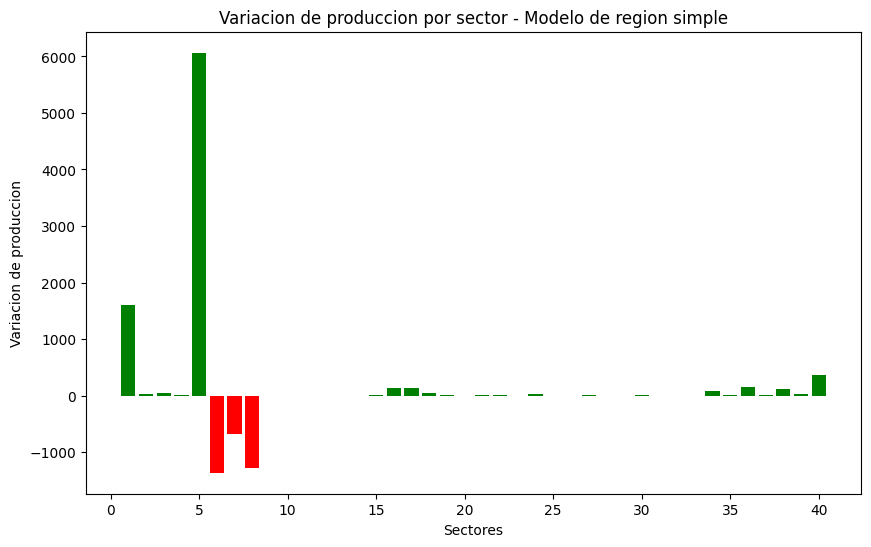

In [13]:
#enumeramos los sectores
sectores = np.arange(1, 41)
valores = delta_p.flatten()

#creamos el histograma
plt.figure(figsize=(10, 6))
colores = ['red' if valor < 0 else 'green' for valor in valores]
plt.bar(sectores, valores, color=colores)

plt.xlabel('Sectores')
plt.ylabel('Variacion de produccion')
plt.title('Variacion de produccion por sector - Modelo de region simple')

plt.show()

- Los sectores representados por las barras verdes muestran un aumento en la producción. Destaca un sector, probablemente el sector 5, que tiene una variación de producción muy alta, por encima de 6000 unidades, lo que indica que este sector es particularmente sensible o beneficiado bajo el modelo de región simple

- Los sectores en rojo indican una disminución en la producción. En particular, hay un par de sectores (probablemente los sectores 6, 7 y 8) donde se observa una caída significativa en la producción, lo cual puede indicar que estos sectores sufren en este modelo bajo ciertas condiciones o shocks

- En general no todos los sectores presentan grandes variaciones. La mayor parte de los sectores (especialmente entre el 10 y el 35) parecen tener cambios marginales o nulos en la producción. Esto sugiere que el modelo simple podría estar favoreciendo algunos sectores clave y afectando negativamente a unos pocos, mientras que el resto permanece relativamente constante

Veamos ahora de hacer lo mismo a traves de un analisis regional. Siendo:

$$
\left(\left(\begin{array}{ll}
I_{n \times n} & 0_{n \times m} \\
0_{m \times n} & I_{m \times m}
\end{array}\right)-\left(\begin{array}{ll}
A^{r r} & A^{r s} \\
A^{s r} & A^{s s}
\end{array}\right)\right)\binom{p^r}{p^s}=\binom{d^r}{d^s}
$$

En la consigna 6 vimos que:

$$
\left(I-A^{r r}\right)p^r+  A^{r s} p^s=d^r
$$

Veamos de obtener $d^r$:

In [14]:
# definimos todas las variables necesarias
A_rr = A[:40, :40]
A_rs = A[:40, 40:]
p_r = p[:40]
p_s = p[40:]

d_r = ((I - A_rr) @ p_r)+(A_rs @ p_s)
d_r

array([  78821.22119216,    1653.76966512,   32912.82761611,
         41898.89985016,   57670.619198  ,   44659.77066627,
         19118.84106944,   44721.57510088,   18253.82438895,
          7285.0621594 ,    9252.40231906,   27713.12503416,
         16235.24341903,    3482.51715354,   19962.94908739,
         44536.81271834,   19736.73478477,   17422.48685853,
         19263.28836418,    9772.74355915,    5933.82684758,
         14779.97784672,    9193.82169075,   14707.27798871,
         46776.07867035,   11049.5295608 ,   20467.67642563,
         18208.62916907,    3838.57711534,  106459.01469414,
          4939.6459739 ,   12814.24194572,   25333.80713273,
         29483.46181341,  251915.91973644,   65010.59721795,
         42790.7590975 ,  118139.01787797,   81723.51420177,
       1202432.03316326])

Nuevamente aplicamos el shock en la demanda de los sectores correspondientes:

In [15]:
#aplicamos los shocks
d_r_shockeado = d_r.copy()

d_r_shockeado[indice_s05] *= (1 - 0.10)
d_r_shockeado[indice_s06] *= (1 + 0.033)
d_r_shockeado[indice_s07] *= (1 + 0.033)
d_r_shockeado[indice_s08] *= (1 + 0.033)

Como:

$$
\left(I-A^{r r}-A^{r s}\left(I-A^{s s}\right)^{-1} A^{s r}\right) \Delta p^r=\Delta d^r
$$

Tenemos que:

In [16]:
#definimos todas las variables necesarias
A_rr = A[:40, :40]
A_rs = A[:40, 40:]
A_sr = A[40:, :40]
A_ss = A[40:, 40:]
delta_d_r = d_r - d_r_shockeado
P, L, U = calcularLU(I-A_ss)

#calculamos la produccion
delta_p2 = solve((I - A_rr - (A_rs @ inversaLU(L, U, P) @ A_sr)), delta_d_r)
delta_p2

array([ 1.60596838e+03,  3.36981021e+01,  4.83390239e+01,  5.99346401e+00,
        6.06507454e+03, -1.36231237e+03, -6.80430982e+02, -1.28005454e+03,
       -1.43720782e-02,  6.19419087e-03,  4.59936770e-01,  1.42534116e+00,
        8.11347185e-01,  7.90805389e-02,  7.97460532e+00,  1.32268431e+02,
        1.35051634e+02,  5.55739894e+01,  1.32372960e+01,  2.95983529e+00,
        6.53477344e+00,  7.00716294e+00, -3.59490575e+00,  2.58434080e+01,
        2.97363980e+00,  5.21047012e-01,  4.15563636e+00,  8.58630957e-01,
        1.80962211e-01,  6.30148908e+00,  1.78602364e-01,  4.63323468e-01,
        1.90634080e+00,  7.71972094e+01,  6.34913739e+00,  1.45901078e+02,
        5.60674626e+00,  1.14860240e+02,  3.72448639e+01,  3.58489154e+02])

Vamos a visualizar las matrices inter-regionales $A^{rs}$ y $A^{sr}$, que reflejan las interacciones entre los sectores productivos de Brasil y Guatemala. Estas matrices contienen los coeficientes técnicos que describen la dependencia de la producción de un país sobre los insumos del otro.

El propósito de esta visualización es destacar lo pequeños que son los valores de los coeficientes técnicos inter-regionales

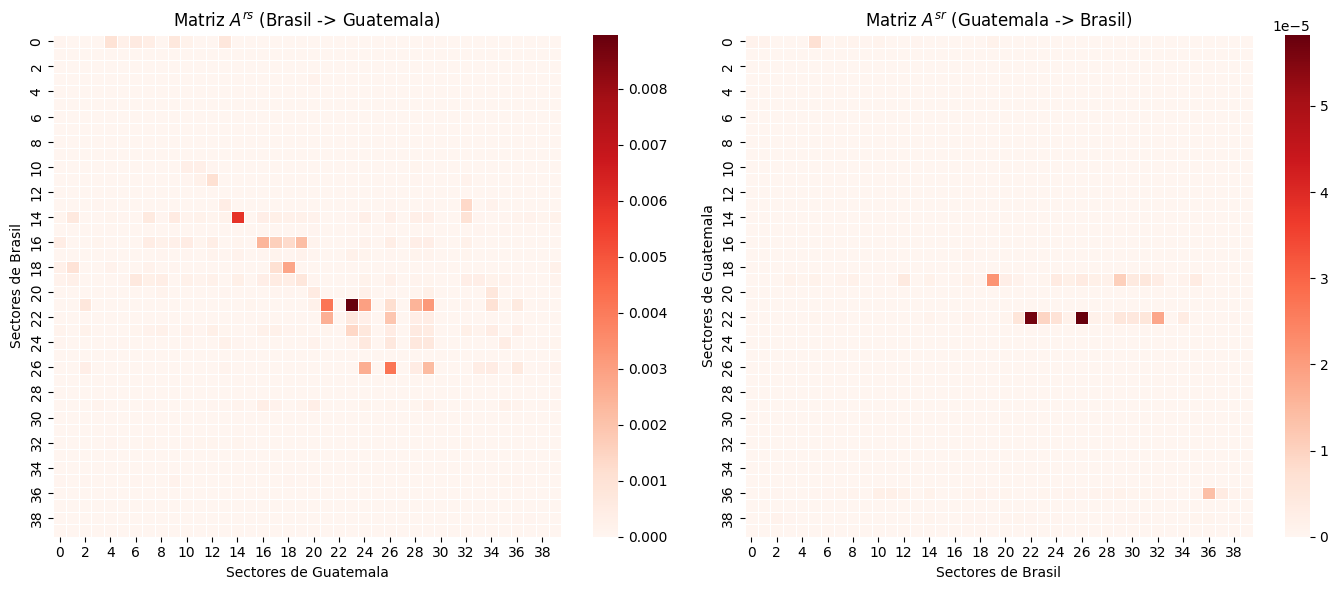

In [17]:
plt.figure(figsize=(14, 6))

# Mapa de calor para la matriz A_rs (interacciones de Brasil a Guatemala)
plt.subplot(1, 2, 1)
sns.heatmap(A_rs, cmap="Reds", annot=False, linewidths=.5)
plt.title('Matriz $A^{rs}$ (Brasil -> Guatemala)')
plt.xlabel('Sectores de Guatemala')
plt.ylabel('Sectores de Brasil')

# Mapa de calor para la matriz A_sr (interacciones de Guatemala a Brasil)
plt.subplot(1, 2, 2)
sns.heatmap(A_sr, cmap="Reds", annot=False, linewidths=.5)
plt.title('Matriz $A^{sr}$ (Guatemala -> Brasil)')
plt.xlabel('Sectores de Brasil')
plt.ylabel('Sectores de Guatemala')

plt.tight_layout()
plt.show()


Asimetría en las interacciones:

- La matriz $A^{rs}$ (Brasil → Guatemala) muestra varias interacciones entre sectores, donde los valores más altos se concentran principalmente en los sectores alrededor del 15 al 30 de ambos países. Esto indica que Guatemala depende de ciertos insumos provenientes de sectores específicos de Brasil para su producción.

- En contraste, la matriz $A^{sr}$ (Guatemala → Brasil) presenta valores mucho más pequeños y dispersos, lo que refleja que la dependencia de Brasil sobre los insumos provenientes de Guatemala es menor. Esto sugiere una relación asimétrica, donde Brasil exporta más insumos clave a Guatemala de los que importa de este país.

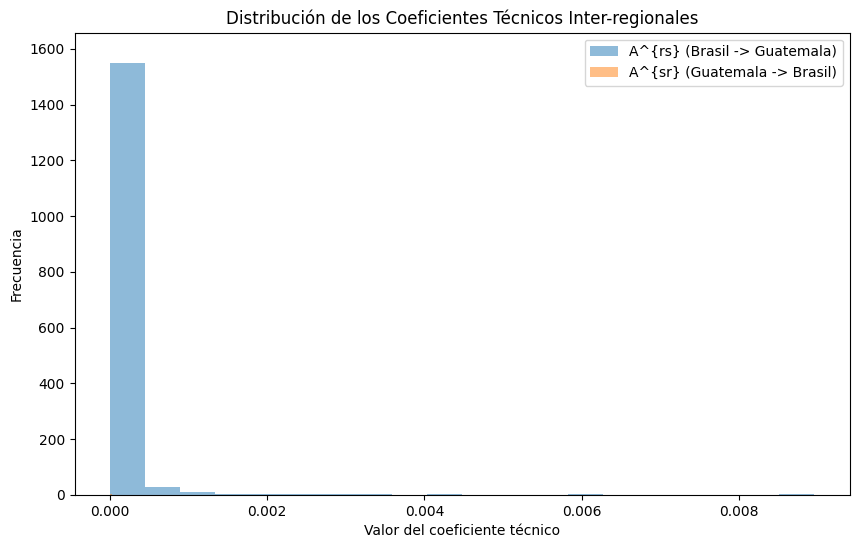

In [18]:
plt.figure(figsize=(10, 6))

# Aplanar las matrices para obtener los valores en un solo array
valores_A_rs = A_rs.flatten()
valores_A_sr = A_sr.flatten()

# Crear histogramas
plt.hist(valores_A_rs, bins=20, alpha=0.5, label='A^{rs} (Brasil -> Guatemala)')
plt.hist(valores_A_sr, bins=20, alpha=0.5, label='A^{sr} (Guatemala -> Brasil)')
plt.xlabel('Valor del coeficiente técnico')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Coeficientes Técnicos Inter-regionales')
plt.legend(loc='upper right')
plt.show()


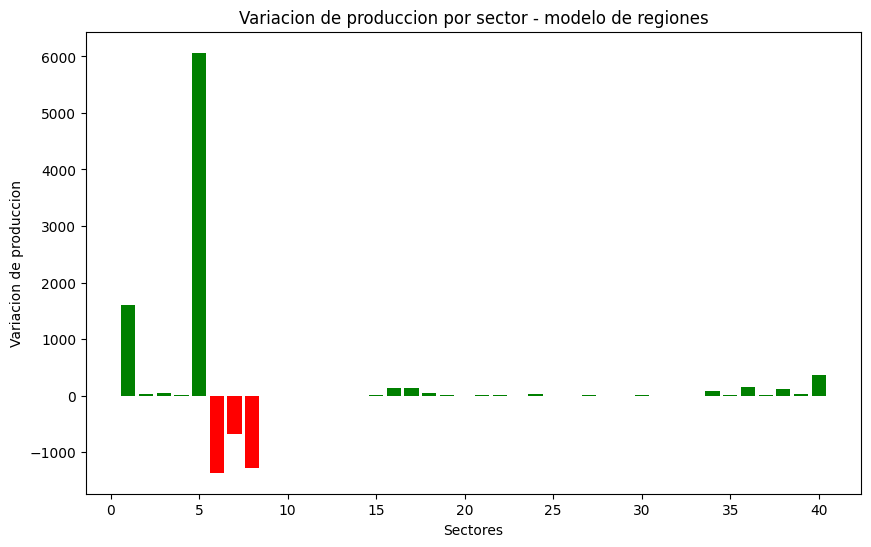

In [19]:
#enumeramos los sectores
sectores = np.arange(1, 41)
valores = delta_p2.flatten()

#creamos el histograma
plt.figure(figsize=(10, 6))
colores = ['red' if valor < 0 else 'green' for valor in valores]
plt.bar(sectores, valores, color=colores)


plt.xlabel('Sectores')
plt.ylabel('Variacion de produccion')
plt.title('Variacion de produccion por sector - modelo de regiones')

plt.show()

El gráfico es muy similar al de región simple, lo que indica que las interacciones inter-regionales con Guatemala no introducen cambios sustanciales en la mayoría de los sectores

Notemos que la diferencia entre la variacion de la produccion con el modelo de region simple y el de regiones es practicamente nula. Comprobemos:

In [23]:
delta_p - delta_p2

array([7.17879162e-03, 1.50619665e-04, 4.74600132e-04, 7.14221586e-05,
       1.42232078e-04, 6.49141163e-04, 1.62482904e-03, 1.63713892e-02,
       8.29464084e-05, 2.68575188e-07, 3.44836584e-05, 1.39081013e-05,
       5.03745289e-06, 3.16512702e-05, 4.60356232e-04, 1.18944549e-03,
       9.10172298e-04, 4.46805492e-04, 7.64056520e-05, 4.88563452e-04,
       1.35504587e-04, 1.20091326e-04, 6.35267430e-05, 2.08989159e-04,
       5.00730313e-05, 6.97094042e-06, 4.85911096e-05, 1.14795169e-05,
       2.42376714e-06, 1.01825396e-04, 3.29048649e-06, 8.53605507e-06,
       2.23996793e-05, 6.08577251e-04, 7.73507748e-05, 2.33657408e-03,
       3.78471109e-04, 8.85304338e-04, 1.89949750e-03, 2.81557981e-03])

In [24]:
variacion_porcentual = ((delta_p2 - delta_p) / delta_p) * 100
variacion_porcentual

array([-4.47005035e-04, -4.46965799e-04, -9.81806075e-04, -1.19165323e-03,
       -2.34510020e-06,  4.76499728e-05,  2.38794671e-04,  1.27897664e-03,
        5.80485990e-01, -4.33573245e-03, -7.49691597e-03, -9.75763976e-04,
       -6.20871276e-04, -4.00080823e-02, -5.77244440e-03, -8.99258261e-04,
       -6.73939396e-04, -8.03976652e-04, -5.77196514e-04, -1.65037164e-02,
       -2.07354974e-03, -1.71380728e-03,  1.76716359e-03, -8.08668383e-04,
       -1.68386864e-03, -1.33785378e-03, -1.16926837e-03, -1.33693798e-03,
       -1.33935956e-03, -1.61586807e-03, -1.84231933e-03, -1.84231933e-03,
       -1.17499537e-03, -7.88334783e-04, -1.21827309e-03, -1.60145264e-03,
       -6.74982504e-03, -7.70760632e-04, -5.09976524e-03, -7.85395503e-04])

Veamos graficamente la variacion porcentual: 

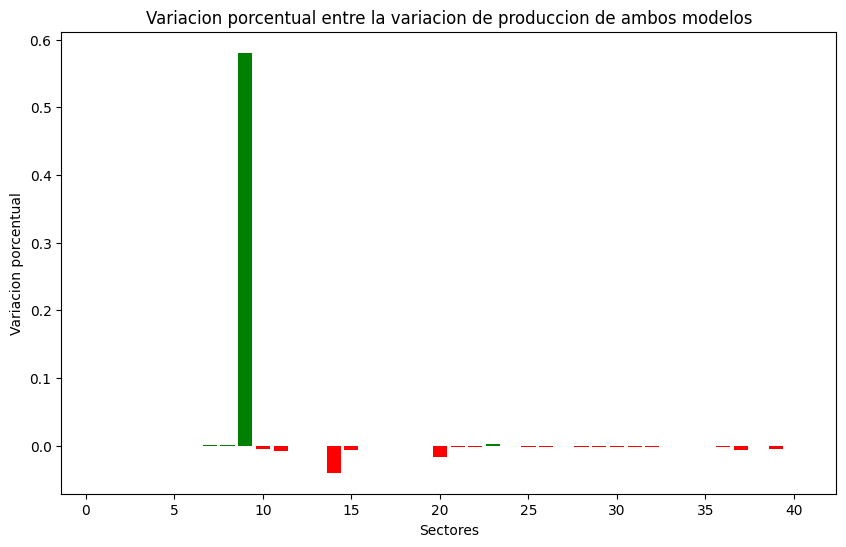

In [25]:
#enumeramos los sectores
sectores = np.arange(1, 41)
valores = variacion_porcentual.flatten()

#creamos el histograma
plt.figure(figsize=(10, 6))
colores = ['red' if valor < 0 else 'green' for valor in valores]
plt.bar(sectores, valores, color=colores)

plt.xlabel('Sectores')
plt.ylabel('Variacion porcentual')
plt.title('Variacion porcentual entre la variacion de produccion de ambos modelos')

plt.show()

Con todo esto, concluimos lo siguiente:

1. **Comparación entre Modelos de Región Simple y Completa:**
   - El modelo de región simple considera solo la matriz intra-regional de Brasil $A^{rr}$, ignorando las interacciones con Guatemala.
   - El modelo completo incorpora las interacciones inter-regionales, incluyendo los efectos de las matrices $A^{rs}$ y $A^{sr}$ que reflejan la conexión entre los países.

2. **Resultados:**
   - Al comparar ambos modelos, observamos que en la mayoría de los sectores brasileños las diferencias en la variación de producción son mínimas, con porcentajes de variación cercanos a cero. Esto sugiere que estos sectores no dependen significativamente de las interacciones con Guatemala
   - En algunos sectores, las diferencias son más notables, pero en términos porcentuales, estas variaciones no superan el 60%, lo que indica que, aunque existen interacciones entre Brasil y Guatemala, su impacto sigue siendo limitado en la mayoría de los casos

3. **Conclusión y Justificación:**
   - Las diferencias porcentuales observadas indican que las interacciones entre Brasil y Guatemala son insignificantes, su influencia es limitada en la mayoría de los sectores. Muchos sectores muestran una baja dependencia de los insumos de Guatemala, lo que sugiere que la economía brasileña en este contexto es relativamente autosuficiente.
   - Los sectores donde se aplican los shocks, como BRAs5, BRAs6, BRAs7, y BRAs8, presentan una autosuficiencia alta